<h1>To implement a Machine Learning Classification model using a Logistic  regression algorithm </h1>

<h3>Import Lab</h3>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

<h3>Read and Print the data from the CSV file.</h3>

In [4]:
file_path = './CSV files/Diabetes.csv'
df = pd.read_csv(file_path)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<h3>Preprocessing: Replace 0 values with NaN in relevant columns</h3>

In [6]:
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace_zero] = df[cols_to_replace_zero].replace(0, pd.NA)

<h3> Drop rows with NaN values</h3>

In [7]:
df.dropna(inplace=True)

<h3>Split features and target variable</h3>

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

<h3>Split the data into training and testing sets</h3>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Standardize features by removing the mean and scaling to unit variance</h3>

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>Train the logistic regression model.</h3>

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

<h3>Make predictions on the testing set</h3>

In [13]:
y_pred = model.predict(X_test_scaled)

<h3> Evaluate the model's performance</h3>

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

<h3>Print</h3>

In [16]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7721518987341772
Precision: 0.6956521739130435
Recall: 0.5925925925925926
F1 Score: 0.6399999999999999


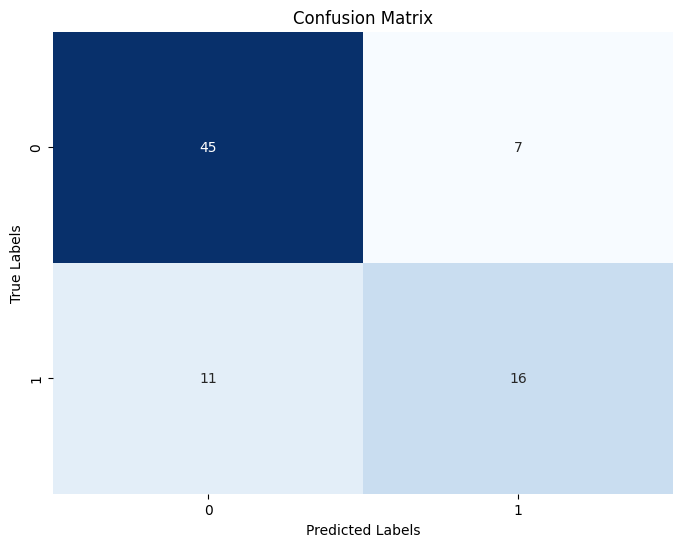

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()